In [5]:
pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [33]:
import mysql.connector 

cnx = mysql.connector.connect(user='root', password='Student123@', host='127.0.0.1', database='university_database')

In [34]:
#cursor makes it possible to do the sql consultations in python 
#execute will execute queries 
mycursor = cnx.cursor()
mycursor.execute('SHOW TABLES')
for x in mycursor:
    print(x)

('enrolment',)
('student',)
('teacher',)
('unit',)
('workload',)


In [35]:
Query = "SELECT * FROM student"
cursor = cnx.cursor()
cursor.execute(Query)
for x in mycursor:
    print(x)

('S001', 'MICHAEL BEVAN', datetime.date(1960, 9, 15), Decimal('3.20'), 'CHATSWOOD')
('S002', 'BRIAN LARA', datetime.date(1965, 2, 10), Decimal('4.00'), 'MARSFIELD')
('S003', 'VIVAN RICHARDS', datetime.date(1958, 11, 12), Decimal('4.50'), 'BURWOOD')
('S004', 'JAVED MIANDAD', datetime.date(1966, 5, 5), Decimal('3.50'), 'RYDE')
('S005', 'VIRAT KOHLI', datetime.date(1988, 10, 15), Decimal('4.30'), 'AUBURN')
('S006', 'BABAR AZAM', datetime.date(1991, 4, 20), Decimal('4.20'), 'LAKEMBA')
('S007', 'KUMAR SANGAKARA', datetime.date(1980, 1, 26), Decimal('3.70'), 'REDFERN')


In [36]:
Query = """SELECT unitname FROM unit u, workload w, teacher t 
WHERE u.unitcode = w.unitcode 
AND w.teacherid = t.teacherid 
AND t.teachername LIKE "%N" """
cursor = cnx.cursor()
cursor.execute(Query)
for x in cursor:
    print(x[0])

DATA SCIENCE
MATHEMATICS
BUSSINES ANALYTICS
DATABASES


In [37]:
import pandas as pd

cursor = cnx.cursor() 
cursor.execute("select * from STUDENT ") 
rows = cursor.fetchall()  
print("***** query output presented as a Python list *****") 
print("\n") 
for row in rows: 
    print(row)  
    
print("\n\n") 
print("***** query output presented as a pands dataframe *****") 
print("\n") 

df = pd.read_sql_query("select * from STUDENT ", cnx) 
print(df)     


***** query output presented as a Python list *****


('S001', 'MICHAEL BEVAN', datetime.date(1960, 9, 15), Decimal('3.20'), 'CHATSWOOD')
('S002', 'BRIAN LARA', datetime.date(1965, 2, 10), Decimal('4.00'), 'MARSFIELD')
('S003', 'VIVAN RICHARDS', datetime.date(1958, 11, 12), Decimal('4.50'), 'BURWOOD')
('S004', 'JAVED MIANDAD', datetime.date(1966, 5, 5), Decimal('3.50'), 'RYDE')
('S005', 'VIRAT KOHLI', datetime.date(1988, 10, 15), Decimal('4.30'), 'AUBURN')
('S006', 'BABAR AZAM', datetime.date(1991, 4, 20), Decimal('4.20'), 'LAKEMBA')
('S007', 'KUMAR SANGAKARA', datetime.date(1980, 1, 26), Decimal('3.70'), 'REDFERN')



***** query output presented as a pands dataframe *****


  STUDENTID      STUDENTNAME  STUDENTDOB  STUDENTGPA STUDENTSUBURB
0      S001    MICHAEL BEVAN  1960-09-15         3.2     CHATSWOOD
1      S002       BRIAN LARA  1965-02-10         4.0     MARSFIELD
2      S003   VIVAN RICHARDS  1958-11-12         4.5       BURWOOD
3      S004    JAVED MIANDAD  1966-05-05       

C:\Users\ThaisLOPESMAROUELLI\AppData\Local\Temp\ipykernel_15492\3163466046.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("select * from STUDENT ", cnx)


In [38]:
dfteacher = pd.read_sql_query("select teachername, teachersalary from teacher ", cnx) 
print(dfteacher)

        teachername  teachersalary
0        IMRAN KHAN         250000
1         KAPEL DEV         230000
2  SHAKIB UL HASSAN         100000
3    LARNCE KLUSNER         150000
4        BEN STOKES         130000
5        DALE STAYN         120000
6     GLENN MCGRATH         160000


C:\Users\ThaisLOPESMAROUELLI\AppData\Local\Temp\ipykernel_15492\41690817.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfteacher = pd.read_sql_query("select teachername, teachersalary from teacher ", cnx)


(array([3., 2., 2.]),
 array([100000., 150000., 200000., 250000.]),
 <BarContainer object of 3 artists>)

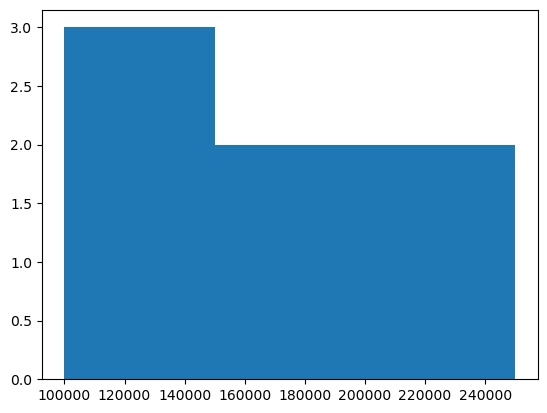

In [47]:
import matplotlib.pyplot as plt

plt.hist(dfteacher['teachersalary'],bins = [100000, 150000, 200000, 
250000])    

In [41]:
teacherdesignation = pd.read_sql_query("select * from teacher ", cnx) 
print(teacherdesignation)

  TEACHERID       TEACHERNAME   TEACHERDESIGNATION  TEACHERSALARY
0      T002        IMRAN KHAN            PROFESSOR         250000
1      T003         KAPEL DEV            PROFESSOR         230000
2      T004  SHAKIB UL HASSAN             LECTURER         100000
3      T005    LARNCE KLUSNER            ASSOCIATE         150000
4      T006        BEN STOKES             LECTURER         130000
5      T007        DALE STAYN      SENIOR LECTURER         120000
6      T008     GLENN MCGRATH  ASSOCIATE PROFESSOR         160000


C:\Users\ThaisLOPESMAROUELLI\AppData\Local\Temp\ipykernel_15492\375318154.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  teacherdesignation = pd.read_sql_query("select * from teacher ", cnx)


<Axes: title={'center': 'TEACHERSALARY'}, xlabel='TEACHERDESIGNATION'>

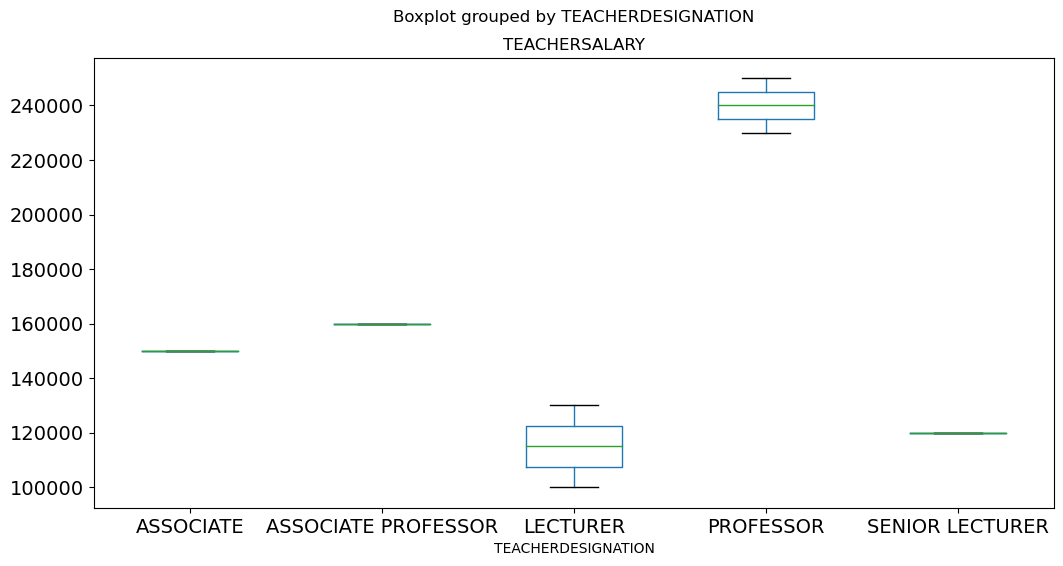

In [42]:
teacherdesignation.boxplot(by ='TEACHERDESIGNATION', column=['TEACHERSALARY'], grid = False, figsize=(12,6), fontsize=14) 

In [45]:
studentcredits = pd.read_sql_query("""select s.studentname, sum(u.unitcreditpoints) as totalcredits 
from student s 
join enrolment e on s.studentid = e.studentid 
join unit u on e.unitcode = u.unitcode
group by s.studentname;""", cnx)

print(studentcredits)

       studentname  totalcredits
0    MICHAEL BEVAN          10.0
1       BRIAN LARA           3.0
2   VIVAN RICHARDS           6.0
3    JAVED MIANDAD           6.0
4      VIRAT KOHLI           2.0
5       BABAR AZAM           3.0
6  KUMAR SANGAKARA           3.0


C:\Users\ThaisLOPESMAROUELLI\AppData\Local\Temp\ipykernel_15492\2143911151.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  studentcredits = pd.read_sql_query("""select s.studentname, sum(u.unitcreditpoints) as totalcredits


In [46]:
print(studentcredits[studentcredits.totalcredits==studentcredits.totalcredits.max()])

     studentname  totalcredits
0  MICHAEL BEVAN          10.0


In [53]:
df1 = pd.read_sql_query("""SELECT distinct T.TEACHERID, TEACHERNAME
FROM TEACHER T, WORKLOAD W  
WHERE T.TEACHERID= W.TEACHERID  
AND SCHEDULEHOURS = 3.5""", cnx) 

print("***** Output for version 1 *****") 
print(df1) 

df2 = pd.read_sql_query("""SELECT distinct T.TEACHERID, TEACHERNAME
FROM TEACHER T, WORKLOAD W 
WHERE (T.TEACHERID, SCHEDULEHOURS) = (W.TEACHERID, 3.5)""", cnx)

print("\n") 
print("***** Output for version 2 *****") 
print(df2)  

cnx.close()     

***** Output for version 1 *****
  TEACHERID       TEACHERNAME
0      T004  SHAKIB UL HASSAN
1      T006        BEN STOKES


***** Output for version 2 *****
  TEACHERID       TEACHERNAME
0      T004  SHAKIB UL HASSAN
1      T006        BEN STOKES


C:\Users\ThaisLOPESMAROUELLI\AppData\Local\Temp\ipykernel_15492\2584216374.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query("""SELECT distinct T.TEACHERID, TEACHERNAME
C:\Users\ThaisLOPESMAROUELLI\AppData\Local\Temp\ipykernel_15492\2584216374.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query("""SELECT distinct T.TEACHERID, TEACHERNAME
